In [ ]:
import pandas as pd
from pandas.io.json import json_normalize
import requests
import json
import os
from fuzzywuzzy import process, fuzz
from wordcloud import WordCloud, STOPWORDS
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns
# set seaborn style 
sns.set(style="whitegrid")

### Kitchener data

In [67]:
import requests
response2010 = requests.get("https://opendata.arcgis.com/datasets/a47ef9f046d442808c306dfd59ec2f7c_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1998 = requests.get("https://opendata.arcgis.com/datasets/d056d3e23558481bbd99376e1718d0a3_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1997 = requests.get("https://opendata.arcgis.com/datasets/fcfa7d6ada794969bbed357e4bd85294_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1996 = requests.get("https://opendata.arcgis.com/datasets/76f77c2b2d864689bc0fc9adfbf690f7_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1995 = requests.get("https://opendata.arcgis.com/datasets/f362b8c4652d49d6bbb7a59478132caf_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1992 = requests.get("https://opendata.arcgis.com/datasets/a59f7b37fcc540438a63b36035ca0068_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2003 = requests.get("https://opendata.arcgis.com/datasets/02223f9066294cadb1737234d5ccc5ab_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2004 = requests.get("https://opendata.arcgis.com/datasets/78ab0cb401c349fa95c16b83d7e5d194_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2005 = requests.get("https://opendata.arcgis.com/datasets/bde5696c88654b6d84ae5ad7f6c910b6_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1993 = requests.get("https://opendata.arcgis.com/datasets/5f3c2930f4e4459ea66c6765a1b3bd88_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2000 = requests.get("https://opendata.arcgis.com/datasets/f218c27832da4fa083eb7b7c7dc1afec_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2002 = requests.get("https://opendata.arcgis.com/datasets/39f6b9d302354b2bbe044220c10621fd_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2007 = requests.get("https://opendata.arcgis.com/datasets/ad3e9afade7a4542839c562adfaff15e_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2008 = requests.get("https://opendata.arcgis.com/datasets/ebdd6808d748465689e343427cd8bf2f_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2006 = requests.get("https://opendata.arcgis.com/datasets/6b85448141bd4186850540e49189ce9d_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1994 = requests.get("https://opendata.arcgis.com/datasets/8c7ecc63062f470ab0793159cd7fbd8b_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response1999 = requests.get("https://opendata.arcgis.com/datasets/a89b670d719a4d77a9190db4c456be3e_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2001 = requests.get("https://opendata.arcgis.com/datasets/a5f9ee5558e94e8fb6db498c1a318863_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2011 = requests.get("https://opendata.arcgis.com/datasets/d20e0fe797ac49f2b5033f81f754763d_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2012 = requests.get("https://opendata.arcgis.com/datasets/19105a10a66043a0802094650964935d_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2013 = requests.get("https://opendata.arcgis.com/datasets/66e434b25b234814831bd46baf9b7619_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2014 = requests.get("https://opendata.arcgis.com/datasets/dcd52c58025d4e6dbd6c188362f4322d_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2015 = requests.get("https://opendata.arcgis.com/datasets/c4327fc9ba164100a806bc9244b73908_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2016 = requests.get("https://opendata.arcgis.com/datasets/31937f8462c347188bb06796f73442df_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
response2009 = requests.get("https://opendata.arcgis.com/datasets/f2ab29afe873498f824492d114f80dc7_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
responses = [response1993, response1994, response1995, response1996, response1997, response1998, response1999, response2000, response2001, response2002, response2003, response2004, response2005, response2006, response2007, 
             response2008, response2009, response2010, response2011, response2012, response2013, response2014, response2015, response2016]

In [128]:
colnames = ['Decision', 'OBJECTID', 'Request_Number', 'Request_Type', 'Source', 'Summary_of_Request']
all_df = pd.DataFrame(columns=colnames)
len_arr = []
# in 2014, some of the columns had an extra ':' afterward, so fix the column headings here
for response in responses:
    data = response.json()
    df = json_normalize(data["features"])
    df.columns = colnames
    len_arr.append(len(df['OBJECTID']))
    all_df = all_df.append(df, sort=True)
kw_df = all_df
print(len_arr)

[60, 68, 53, 26, 17, 22, 27, 19, 25, 20, 24, 22, 22, 23, 24, 30, 39, 29, 43, 41, 33, 30, 43, 82]


/Users/sjones/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


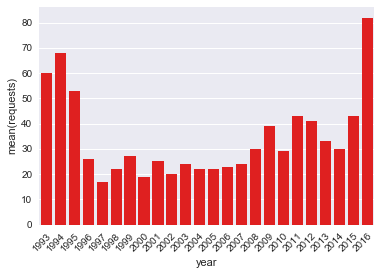

In [146]:
%matplotlib inline
years = range(1993, 2017)
requests_by_year = pd.DataFrame(data={'year': years, 'requests': len_arr})
ax = sns.barplot(x="year", y="requests", data=requests_by_year, color="red")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha="right",rotation_mode='anchor')
plt.show()

Notes written by members of the Maintenance Review Committee for Clerk III, Healthy Environments. Director's submission regarding SARB appeal and GWA client file for {}. Performance evaluations, probationary report, supervisor's notes, and working copies of supervisor's performance notes for {}. Details of support assignment on assistance payments for {}. Weigh slips for landfill truck and ticket issued to {company }. Complaint sent to Income Maintenance by Police regarding {}. List of companies being monitored for sewer discharge and list of companies paying a sewer surcharge. Pricing for supplies and rentals regarding the Home Care Program. Personal information for {} from five job competitions. General information on job competitions (5) Social Services and Community Health Contents of GWA client file for {}, including accusations of threats. Personal Information for {} in Competition File 93-70. Information pertaining to FBA overpayment for {}. Personal Information for {} in Compet

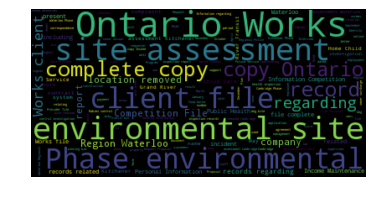

In [207]:
kw_text = " ".join(request for request in kw_df.Summary_of_Request)
# Remove non-informative cases where privacy has been protected
kw_text = kw_text.replace("name removed", "")
kw_text = kw_text.replace("address removed", "")
print(kw_text)
print("There are {} words in the combination of all requests.".format(len(kw_text)))

kw_cloud = WordCloud().generate(kw_text)
plt.figure()
plt.imshow(kw_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()
kw_cloud.to_file("article_figures/kw_cloud.png")

### Toronto data

In [166]:
import re
tor_len_arr = []
tor_year = []
# just keep these columns
tor_colnames = ['Request_Number', 'Request_Type', 'Source', 'Summary', 'Disposition', 'Name']
tor_df = pd.DataFrame(columns=tor_colnames)
for file in os.listdir("Toronto_data/requests"):
    if file.endswith(".xlsx") or file.endswith(".xls"):
        regex = re.compile(r'\d{4}')
        #print(type(regex.findall(file)))
        tor_data = pd.read_excel("Toronto_data/requests/"+file, header=0)
        tor_len_arr.append(len(tor_data['Summary']))
        tor_year.append([int(x) for x in regex.findall(file)])
        tor_df = pd.concat([tor_df,tor_data], axis=0, ignore_index=True, sort=True, join_axes=[tor_df.columns])
tor_year = [x[0] for x in tor_year]

[2015, 2012, 2012, 2017, 2014, 2014, 2016, 2018, 2016, 2018, 2012, 2016, 2014, 2013, 2014, 2012, 2017, 2018, 2015, 2013, 2016, 2017, 2011, 2011, 2017, 2015, 2013, 2015, 2013]


In [70]:
print(tor_df.columns)
print(tor_df.head())
print(tor_df.isnull().sum())

Index(['Request_Number', 'Request_Type', 'Source', 'Summary', 'Disposition',
       'Name'],
      dtype='object')
  Request_Number     Request_Type               Source  \
0  AG-2015-00001  General Records               Public   
1  AG-2015-00001  General Records               Public   
2  AG-2015-00002  General Records               Public   
3  AG-2015-00003  General Records  Academic/Researcher   
4  AG-2015-00004  General Records             Business   

                                             Summary Disposition  \
0  All e-mails to and from Mario Crognale, Direct...         NaN   
1  All e-mails to and from Mario Crognale, Direct...         NaN   
2  A copy of building department file # 400812-19...         NaN   
3  For the period 2004-01-01 to 2014-12-18: -aver...         NaN   
4  Copies of all application submitted (including...         NaN   

                                  Name  
0  Disclosed in Part: Partially Exempt  
1  Disclosed in Part: Partially Exempt  
2  D

/Users/sjones/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


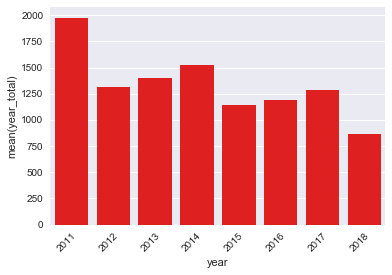

In [180]:
%matplotlib inline
tor_requests_by_year = pd.DataFrame(data={'year': tor_year, 'requests': tor_len_arr})
sum_df = tor_requests_by_year.groupby(["year"])["requests"].sum().reset_index(name ='year_total')
ax = sns.barplot(x="year", y="year_total", data=sum_df, color="red")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha="right",rotation_mode='anchor')
plt.show()

In [187]:
# Now let's fill all of the empty 'Disposition' spots with the Name as these columns are either/or
tor_df['Disposition'] = tor_df['Disposition'].fillna(tor_df['Name'])
tor_df.isnull().sum()

Request_Number     274
Request_Type       585
Source             585
Summary              0
Disposition         25
Name              6226
dtype: int64

In [188]:
tor_df = tor_df.drop(['Name'], axis=1)
# Now rename the 'Disposition' and 'Summary' columns so that they match what we have from KW
tor_df.columns = ['Request_Number', 'Request_Type', 'Source', 'Summary_of_Request', 'Decision']
print(tor_df.columns)

Index(['Request_Number', 'Request_Type', 'Source', 'Summary_of_Request',
       'Decision'],
      dtype='object')


In [189]:
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10699 entries, 0 to 10698
Data columns (total 5 columns):
Request_Number        10425 non-null object
Request_Type          10114 non-null object
Source                10114 non-null object
Summary_of_Request    10699 non-null object
Decision              10674 non-null object
dtypes: object(5)
memory usage: 418.0+ KB


There are 1635865 words in the combination of all requests.


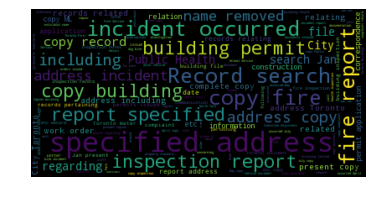

In [190]:
tor_text = " ".join(request for request in tor_df.Summary_of_Request)
# Remove non-informative cases where privacy has been protected
tor_text = tor_text.replace("address removed", "")
print("There are {} words in the combination of all requests.".format(len(tor_text)))

tor_cloud = WordCloud().generate(tor_text)
plt.figure()
plt.imshow(tor_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()
tor_cloud.to_file("article_figures/tor_cloud.png")

#### Combine with KW data

In [114]:
all_df = pd.concat([kw_df, tor_df], axis=0, ignore_index=True, sort=True, join_axes=[tor_df.columns])
text_data = " ".join(request for request in all_df.Summary_of_Request)

In [75]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11521 entries, 0 to 11520
Data columns (total 5 columns):
Request_Number        11247 non-null object
Request_Type          10936 non-null object
Source                10936 non-null object
Summary_of_Request    11521 non-null object
Decision              11496 non-null object
dtypes: object(5)
memory usage: 450.1+ KB


In [116]:
import spacy
from spacy.lang.en import English
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS
import string
parser = English()
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS)+ list(STOPWORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]

def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [117]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to /Users/sjones/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [118]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sjones/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
def prepare_text_for_lda(text):
    tokens = tokenizeText(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [208]:
all_df['Summary_of_Request'] = all_df['Summary_of_Request'].map(lambda x: x.replace("name removed", ""))
all_df['Summary_of_Request'] = all_df['Summary_of_Request'].map(lambda x: x.replace("address removed", ""))
all_df['Summary_of_Request'] = all_df['Summary_of_Request'].map(lambda x: x.replace("location removed", ""))
print(all_df['Summary_of_Request'])
import random
text_data = []
for request in all_df['Summary_of_Request']:
    tokens = prepare_text_for_lda(request)
    if random.random() > .99:
        text_data.append(tokens)

0     Notes written by members of the Maintenance Re...
1     Director's submission regarding SARB appeal an...
2     Performance evaluations, probationary report, ...
3     Details of support assignment on assistance pa...
4     Weigh slips for landfill truck and ticket issu...
5     Complaint sent to Income Maintenance by Police...
6     List of companies being monitored for sewer di...
7     Pricing for supplies and rentals regarding the...
8     Personal information for {} from five job comp...
9     General information on job competitions (5) So...
10    Contents of GWA client file for {}, including ...
11    Personal Information for {} in Competition Fil...
12    Information pertaining to FBA overpayment for {}.
13    Personal Information for {} in Competition Fil...
14      General Information in Competition File 93-070.
15                Human Resources Personal File for {}.
16                     Supervisor/Manager notes for {}.
17    General Information in Caseworker I, Incom

In [209]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
import pickle
pickle.dump(corpus, open('colab/models/corpus.pkl', 'wb'))
dictionary.save('colab/models/dictionary.gensim')

In [210]:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('colab/models/model5.gensim')
topics = ldamodel.print_topics(num_words=4)

In [211]:
for topic in topics:
    print(topic)
    print("------------------------------------------------------------------------------------------")

(0, '0.061*"bench" + 0.061*"grand" + 0.061*"river" + 0.061*"remove"')
------------------------------------------------------------------------------------------
(1, '0.082*"ontario" + 0.082*"provincial" + 0.082*"offence" + 0.082*"note"')
------------------------------------------------------------------------------------------
(2, '0.113*"phase" + 0.113*"environmental" + 0.113*"elmira" + 0.113*"assessment"')
------------------------------------------------------------------------------------------
(3, '0.030*"ontario" + 0.030*"client" + 0.030*"complete" + 0.030*"works"')
------------------------------------------------------------------------------------------
(4, '0.077*"30t86014" + 0.077*"dumfries" + 0.077*"circulation" + 0.077*"subdivision"')
------------------------------------------------------------------------------------------


In [76]:
print(all_df['Decision'].value_counts())
print(len(all_df['Decision'].unique()))

Disclosed in Part: Partially Exempt                6207
All Disclosed                                      2607
No Responsive Records Exist                         547
No Records Exist                                    395
Disclosed in Part: No Records Exist                 329
All disclosed                                       238
Partly exempted                                     197
Nothing Disclosed (exemption)                       181
Transferred Out in Full                             165
Abandoned/Withdrawn by Applicant                    139
Withdrawn                                           116
Nothing Disclosed (excluded)                         61
No records exist                                     54
Information disclosed in part                        50
Partly non-existent                                  32
Nothing disclosed                                    28
No record exists                                     21
Nothing Disclosed                               

### Combine these fields using fuzzywuzzy

In [77]:
all_df['Decision'] = all_df['Decision'].fillna("")

In [78]:
all_df_clean = all_df.copy()

In [79]:
for row in all_df['Decision'].unique():
    for row2 in all_df['Decision'].unique():
        matching_result = fuzz.ratio(row, row2) # could be ratio, partial_ratio, token_set_ratio, token_sort_ratio 
        if matching_result > 80:
            #print(row, row2)
            #print(matching_results)
            #Combine if match found
            all_df_clean['Decision'][all_df_clean['Decision'] == row2] = row

In [80]:
print(all_df_clean['Decision'].value_counts())
print(len(all_df_clean['Decision'].unique()))

 Disclosed in Part: Partially Exempt               6209
All Disclosed                                      2847
No Responsive Records Exist                         558
No Records Exist                                    470
Disclosed in Part: No Records Exist                 329
Nothing Disclosed (excluded)                        242
Partly exempted                                     197
Transferred Out in Full                             165
Abandoned/Withdrawn by Applicant                    139
Withdrawn                                           116
Information disclosed in part                        50
Nothing Disclosed                                    49
Partly non-existent                                  32
No information disclosed                             30
                                                     25
Abandoned After Fee Estimate                         16
Forwarded out                                        15
Abandoned                                       

### Compare with other fuzzywuzzy algorithms

In [81]:
all_df_pr = all_df.copy()

In [82]:
for row in all_df['Decision'].unique():
    for row2 in all_df['Decision'].unique():
        matching_result = fuzz.partial_ratio(row, row2) # could be ratio, partial_ratio, token_set_ratio, token_sort_ratio 
        if matching_result > 80:
            #print(row, row2)
            #print(matching_results)
            #Combine if match found
            all_df_pr['Decision'][all_df_pr['Decision'] == row2] = row

In [83]:
print(all_df_pr['Decision'].value_counts())
print(len(all_df_pr['Decision'].unique()))

 Disclosed in Part: Partially Exempt    6208
All Disclosed                           2847
No Records Exist                        1358
Nothing Disclosed                        291
Request withdrawn                        256
Disclosed in part/ partly exempt         198
Transferred Out in Full                  168
No information disclosed                  80
Non-existent                              35
Abandoned/Withdrawn by Applicant          29
                                          25
Forwarded out                             15
Correction refused                         3
Correction made in part                    3
Not Applicable                             2
Statement of disagreement filed            1
Deemed Refusal                             1
Correction granted                         1
Name: Decision, dtype: int64
18


### 'Partial_ratio' seems to be closer to what we want, i.e. the 'abandoned/withdrawn' cases have been nicely combined

In [84]:
all_df_tsr = all_df.copy()

In [85]:
for row in all_df['Decision'].unique():
    for row2 in all_df['Decision'].unique():
        matching_result = fuzz.token_sort_ratio(row, row2) # could be ratio, partial_ratio, token_set_ratio, token_sort_ratio 
        if matching_result > 80:
            #print(row, row2)
            #print(matching_results)
            #Combine if match found
            all_df_tsr['Decision'][all_df_tsr['Decision'] == row2] = row

In [86]:
print(all_df_tsr['Decision'].value_counts())
print(len(all_df_tsr['Decision'].unique()))

 Disclosed in Part: Partially Exempt               6209
All Disclosed                                      2847
No Responsive Records Exist                         558
No Records Exist                                    470
Disclosed in Part: No Records Exist                 329
Partly exempted                                     197
Nothing Disclosed (exemption)                       181
Transferred Out in Full                             165
Abandoned/Withdrawn by Applicant                    139
Withdrawn                                           116
No information disclosed                             80
Nothing Disclosed (excluded)                         61
Nothing Disclosed                                    49
Partly non-existent                                  32
                                                     25
Abandoned After Fee Estimate                         16
Forwarded out                                        15
Abandoned                                       

### The same as 'partial_ratio'...

In [87]:
all_df_tokset = all_df.copy()

In [88]:
for row in all_df['Decision'].unique():
    for row2 in all_df['Decision'].unique():
        matching_result = fuzz.token_set_ratio(row, row2) # could be ratio, partial_ratio, token_set_ratio, token_sort_ratio 
        if matching_result > 80:
            #print(row, row2)
            #print(matching_results)
            #Combine if match found
            all_df_tokset['Decision'][all_df_tokset['Decision'] == row2] = row

In [89]:
print(all_df_tokset['Decision'].value_counts())
print(len(all_df_tokset['Decision'].unique()))

No Records Exist                    10785
Request withdrawn                     256
Partly exempted                       197
Transferred Out in Full               168
Non-existent                           35
Abandoned/Withdrawn by Applicant       29
                                       25
Forwarded out                          15
Correction refused                      3
Correction made in part                 3
Not Applicable                          2
Deemed Refusal                          1
Statement of disagreement filed         1
Correction granted                      1
Name: Decision, dtype: int64
14


### We've trimmed a few more categories, but the 'All disclosed' branch has been lumped in with 'Nothing Disclosed (excluded)' which obviously won't do. Let's use 'partial_ratio' going forward.

### Still need to combine some cases manually

In [90]:
all_df_pr['Decision'].loc[all_df_pr['Decision'] == "Non-existent"] = "No Records Exist"
all_df_pr['Decision'].loc[all_df_pr['Decision'] == "No information disclosed "] = "Nothing Disclosed"
all_df_pr['Decision'].loc[all_df_pr['Decision'] == "Disclosed in part/ partly exempt"] = " Disclosed in Part: Partially Exempt"

In [91]:
all_df_pr['Decision'].value_counts()

 Disclosed in Part: Partially Exempt    6406
All Disclosed                           2847
No Records Exist                        1393
Nothing Disclosed                        371
Request withdrawn                        256
Transferred Out in Full                  168
Abandoned/Withdrawn by Applicant          29
                                          25
Forwarded out                             15
Correction refused                         3
Correction made in part                    3
Not Applicable                             2
Deemed Refusal                             1
Statement of disagreement filed            1
Correction granted                         1
Name: Decision, dtype: int64

### Restrict to the top 6 decisions

In [92]:
all_df_top6 = all_df_pr.groupby('Decision').filter(lambda x: len(x) > 100)
print(all_df_top6['Decision'].value_counts())
categories = all_df_top6['Decision'].value_counts().index.tolist()

 Disclosed in Part: Partially Exempt    6406
All Disclosed                           2847
No Records Exist                        1393
Nothing Disclosed                        371
Request withdrawn                        256
Transferred Out in Full                  168
Name: Decision, dtype: int64


In [93]:
# encode the target variable as an integer
all_df_top6['category_id'] = all_df_top6['Decision'].factorize()[0]

/Users/sjones/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [94]:
category_id_df = all_df_top6[['Decision', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df.head()

,Decision,category_id
0,All Disclosed,0
1,No Records Exist,1
2,Disclosed in Part: Partially Exempt,2
26,Request withdrawn,3
152,Nothing Disclosed,4


In [95]:
### Don't need this right now
#category_to_id = dict(category_id_df.values)
#print(category_to_id)
#id_to_category = dict(category_id_df[['category_id', 'Decision']].values)
#print(id_to_category)

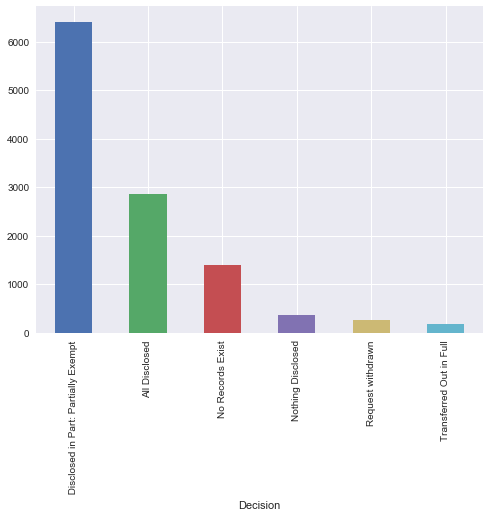

In [96]:
fig = plt.figure(figsize=(8,6))
all_df_top6.groupby('Decision').Summary_of_Request.count().plot.bar(ylim=0)
plt.show()

In [97]:
# Here is where we might put in upsampling

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', 
                       encoding='latin-1', ngram_range=(1,2), stop_words='english')

features = tfidf.fit_transform(all_df_top6.Summary_of_Request).toarray()
labels = all_df_top6.category_id
features.shape

/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


(11441, 6705)

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

X_train, X_test, y_train, y_test = train_test_split(all_df_top6['Summary_of_Request'], all_df_top6['Decision'], test_size=0.33, random_state=42, shuffle=True)

In [100]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3,
                          random_state=0), #, class_weight='balanced'),
    LinearSVC(), #class_weight='balanced'),
    MultinomialNB(),
    LogisticRegression(random_state=0)#, class_weight='balanced'),
]
CV=5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries=[]
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels,
                                scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/Users/sjones/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


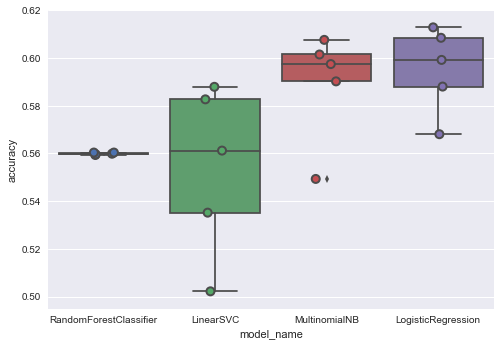

model_name
LinearSVC                 0.553828
LogisticRegression        0.595331
MultinomialNB             0.589216
RandomForestClassifier    0.559916
Name: accuracy, dtype: float64


In [101]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
             size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()
print(cv_df.groupby('model_name').accuracy.mean())

In [102]:
X_train.head()

10949    A copy of all building records for {a specifie...
1956     Copies of documents from Festival Management C...
9595     A copy of the fire report for {a specified add...
9551     A copy of the fire report for {a specified add...
5116     A copy of the fire report for {a specified add...
Name: Summary_of_Request, dtype: object

In [103]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

In [107]:
y_train_dums = pd.get_dummies(y_train)
y_test_dums = pd.get_dummies(y_test)
print(y_train)

10949     Disclosed in Part: Partially Exempt
1956                         No Records Exist
9595      Disclosed in Part: Partially Exempt
9551      Disclosed in Part: Partially Exempt
5116      Disclosed in Part: Partially Exempt
7544                         No Records Exist
7130      Disclosed in Part: Partially Exempt
5049                            All Disclosed
3653                  Transferred Out in Full
9369      Disclosed in Part: Partially Exempt
2093      Disclosed in Part: Partially Exempt
4017                         No Records Exist
10622                        No Records Exist
2401      Disclosed in Part: Partially Exempt
3058                         No Records Exist
3330      Disclosed in Part: Partially Exempt
2264      Disclosed in Part: Partially Exempt
6445      Disclosed in Part: Partially Exempt
7744      Disclosed in Part: Partially Exempt
1161                            All Disclosed
4969      Disclosed in Part: Partially Exempt
6092      Disclosed in Part: Parti

In [105]:
from sklearn.metrics import accuracy_score

NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=tokenizeText, stop_words='english')),
                ('clf', OneVsRestClassifier(MultinomialNB())),
            ])

for decision in categories:
    print(decision)
    NB_pipeline.fit(X_train, y_train_dums[decision])
    prediction = NB_pipeline.predict(X_test)    
    print('Test accuracy is {}'.format(accuracy_score(y_test_dums[decision], prediction)))
    
# Is accuracy the  best metric here?
# Timeline before request is abandoned?
# Gensim topic modeling to compare KW and Toronto language

 Disclosed in Part: Partially Exempt


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.6986228813559322
All Disclosed


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.7523834745762712
No Records Exist


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.887447033898305
Nothing Disclosed


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.9647775423728814
Request withdrawn


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.9753707627118644
Transferred Out in Full


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Test accuracy is 0.9856991525423728


/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [0]:
LSVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=tokenizeText, stop_words='english')),
                ('clf', OneVsRestClassifier(LinearSVC())),
            ])

for decision in categories:
    print(decision)
    LSVC_pipeline.fit(X_train, y_train_dums[decision])
    prediction = LSVC_pipeline.predict(X_test)    
    print('Test accuracy is {}'.format(accuracy_score(y_test_dums[decision], prediction)))

In [0]:
LR_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=tokenizeText, stop_words='english')),
                ('clf', OneVsRestClassifier(LogisticRegression(random_state=0))),
            ])

for decision in categories:
    print(decision)
    LR_pipeline.fit(X_train, y_train_dums[decision])
    prediction = LR_pipeline.predict(X_test)    
    print('Test accuracy is {}'.format(accuracy_score(y_test_dums[decision], prediction)))

In [0]:
RF_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=tokenizeText, stop_words='english')),
                ('clf', OneVsRestClassifier(RandomForestClassifier(n_estimators=200, max_depth=3,
                          random_state=0))),
            ])

for decision in categories:
    print(decision)
    RF_pipeline.fit(X_train, y_train_dums[decision])
    prediction = RF_pipeline.predict(X_test)    
    print('Test accuracy is {}'.format(accuracy_score(y_test_dums[decision], prediction)))

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

knn_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=tokenizeText, stop_words='english')),
                ('clf', KNeighborsClassifier(n_neighbors=1)),
            ])

knn_pipeline.fit(X_train, y_train)

#plot_decision_regions(X_train.values, y_train.values, clf=knn)
# ROC curve

knn_pipeline.score(X_test, y_test)

In [0]:
from xgboost import XGBClassifier

xgb_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=tokenizeText, stop_words='english')),
                ('clf', XGBClassifier(silent=False, n_jobs=-1))
])

xgb_pipeline.fit(X_train, y_train)

xgb_pipeline.score(X_test, y_test)

/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[16:12:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:12:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:12:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:12:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:12:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[16:12:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:12:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:12:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:12:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_d

/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/sjones/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.618114406779661

### LSTM model

In [0]:
y_train.head()

10949     Disclosed in Part: Partially Exempt
1956                         No Records Exist
9595      Disclosed in Part: Partially Exempt
9551      Disclosed in Part: Partially Exempt
5116      Disclosed in Part: Partially Exempt
Name: Decision, dtype: object

In [0]:
import numpy as np

from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, LSTM, GRU, Flatten, Input, Bidirectional, GlobalMaxPooling1D, Dropout
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback

/Users/sjones/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [0]:
num_classes = 6
embedding_dim = 300
epochs = 50
batch_size = 128
max_len = 40

class_weights = {0: 2,
                1: 5,
                2: 1,
                3: 25,
                4: 17,
                5: 38}

#imbalanced_learn

In [0]:
# One hot encoding target
# sub in 'category_id' column here
def onehot(arr, num_class):
    return np.eye(np.max(arr) + 1)[np.array(arr.astype(int))]

new_y = onehot(all_df_top6['category_id'], num_classes)
#print(new_y.shape)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(all_df_top6['Summary_of_Request'], new_y, test_size = 0.05)

In [0]:
embeddings_index = {}

# Download this file first
#f = open("/Users/sjones/Downloads/glove.840B.300d.txt", encoding="utf8")
f = open("/Users/sjones/Downloads/glove.6B/glove.6B.300d.txt", encoding="utf8")

for line in f:
    values = line.split()
    word = ''.join(values[:-embedding_dim])
    coefs = np.asarray(values[-embedding_dim:], dtype="float32")
    embeddings_index[word] = coefs
f.close()

tokenizer = Tokenizer(num_words = None)
tokenizer.fit_on_texts(X_train)

sequences_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(sequences_train, maxlen=max_len)

sequences_val = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(sequences_val, maxlen=max_len)

word_index = tokenizer.word_index

#create embedding layer
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
# Google Colaboratory for GPUs

In [0]:
input= Input(shape=(max_len, ), dtype = 'int32')
embedding_layer = Embedding(len(word_index) + 1, embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length=max_len, trainable=False)
embedded_sequences = embedding_layer(input)
x = Bidirectional(GRU(units=32, return_sequences=True))(embedded_sequences)
x = GlobalMaxPooling1D()(x)
x = Dense(50, activation = 'relu')(x)
x = Dropout(0.1)(x)
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=input, outputs=output)
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

#model = Sequential()
#model.add(embedding_layer)
#model.add(LSTM(units=32, dropout=0.2, recurrent_dropout=0.2))
#model.add(Dense(6, activation='softmax'))
#model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 40)                0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 40, 300)           3660300   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 40, 64)            63936     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                3250      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 306       
Total para

In [0]:
print(X_train.shape)
print(y_train.shape)

(10868, 40)
(10868, 6)


In [0]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_test, y_test), class_weight=class_weights)
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy: %f' % (accuracy*100))
model.reset_states()

Train on 10868 samples, validate on 573 samples
Epoch 1/10
10868/10868 [==============================] - 11s 1ms/step - loss: 5.6880 - acc: 0.3301 - val_loss: 1.5599 - val_acc: 0.3839

In [0]:
from sklearn.metrics import accuracy_score

# Predictions
pred_test = model.predict(X_test)
pred_test = [np.argmax(x) for x in pred_test]

# Actual
true_test = [np.argmax(x) for x in y_test]

# Find accuracies
accuracy = accuracy_score(true_test, pred_test)
print(accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_test, pred_test)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

class_name = ["All Disclosed", "Disclosed in Part: Partially Exempt", "No Records Exist", "Request Withdrawn", "Nothing Disclosed", 
             "Transferred Out in Full"]
plt.colorbar()
tick_marks = np.arange(len(class_name))
plt.xticks(tick_marks, class_name, rotation=45)
plt.yticks(tick_marks, class_name)

plt.show()